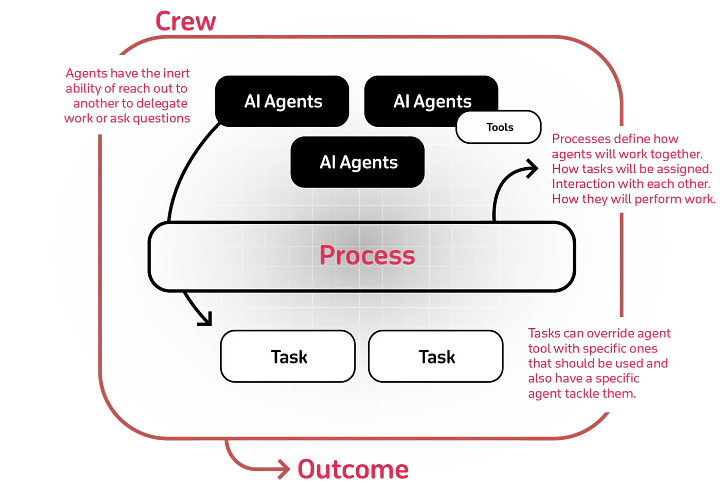

**CrewAI Image ( Soured from the Web) provides the details of the AI Agent**  

In [1]:
!pip install -q -U crewai
!pip install -q -U duckduckgo-search

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.0/42.0 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 3.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.5/48.5 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.0/192.0 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.8/131.8 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 628.3/628.3 kB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 55.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.0/468.0 kB 26.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.1/70.1 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 81.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
import os

from crewai import Agent, Task, Crew, Process, LLM
from crewai_tools import tool

In [5]:
from google.colab import userdata
os.environ["GOOGLE_API_KEY"] = userdata.get('GOOGLE_API_KEY')

my_llm = LLM(
              model='gemini/gemini-1.5-flash',
              api_key=os.environ["GOOGLE_API_KEY"]
            )

In [6]:
my_llm

In [16]:
import time
from langchain.tools import DuckDuckGoSearchRun
search_tool = DuckDuckGoSearchRun()

@tool('DuckDuckGoSearch')
def search_tool(search_query: str):
    """Search the web for information on a given topic"""
    time.sleep(2)
    return DuckDuckGoSearchRun().run(search_query)

In [17]:
searcher = Agent(
    role = 'Content Searcher',
    goal = 'Search for online content about {topic}',
    backstory = '''
                You will be working on creating articles for LinkedIn about {topic}.
                You will conduct research online, collect and group information.
                Your work will serve as a basis for the Content Writer.
                ''',
    llm = my_llm,
    verbose=True,
    allow_delegate=False,
    tools = [search_tool]
)

In [18]:
writer = Agent(
    role = 'Content Writer',
    goal = 'Writing a LinkedIn post about {topic}',
    backstory = ''''
                Your task is to create a LinkedIn article on {topic}, using the data gathered by the Content Searcher as a reference.
                The article should be engaging and informative, maintaining factual accuracy
                ''',
    tools = [search_tool],
    llm=my_llm,
    verbose=True
)

In [19]:
editor = Agent(
    role = 'Content Editor',
    goal = 'Revise the LinkedIn post to guarantee factual accuracy while maintaining a relaxed and entertaining style.',
    backstory = ''''
                Your task is to review and edit a LinkedIn article written by the Content Writer.
                You will ensure that the final version, which should be accurate and well-written.
                ''',
    tools = [search_tool],
    llm=my_llm,
    verbose=True
)

In [20]:
search = Task(
    description=
        '''
         1. Give priority to the most recent trends, key figures, and breaking news related to {topic}.
         2. Determine the target audience, taking into account their interests and challenges.
         3. Incorporate SEO keywords and data from credible sources.
        ''',
    agent=searcher,
    expected_output='A comprehensive trend plan focused on {topic}, incorporating top SEO keywords and the most recent news.'
)

In [21]:
write = Task(
    description='''
        1. Leverage the gathered content data to develop a compelling LinkedIn post centered around the theme of {topic}.
        2. Seamlessly integrate relevant SEO keywords into the content.
        3. Structure the post to be captivating, with a conclusion designed to stimulate reflection.
        ''',
    agent=writer,
    expected_output='A LinkedIn post about {topic}.'
)

In [23]:
review = Task(
    description=("Review the LinkedIn post in question for grammatical errors."
    ),
    agent=editor,
    expected_output='A LinkedIn post ready for publication. The text is formatted in paragraphs and does not use bullet points.'
)

In [24]:
crew = Crew(
    agents=[searcher,writer,editor],
    tasks=[search,write,review],
    verbose=1,
    process=Process.sequential
)

In [25]:
subject = 'Career opportunities for developers specializing in Multi-Agent Systems'

template_input = {"topic": subject}

result = crew.kickoff(inputs=template_input)

# Agent: Content Searcher
## Task: 
         1. Give priority to the most recent trends, key figures, and breaking news related to Career opportunities for developers specializing in Multi-Agent Systems.
         2. Determine the target audience, taking into account their interests and challenges.
         3. Incorporate SEO keywords and data from credible sources.
        
 

I encountered an error while trying to use the tool. This was the error: https://links.duckduckgo.com/d.js?q=career+opportunities+multi-agent+systems+developers&kl=wt-wt&l=wt-wt&p=&s=0&df=y&vqd=4-291316461045049996081141300366338360142&bing_market=wt-WT&ex=-1 202 Ratelimit.
 Tool DuckDuckGoSearch accepts these inputs: Tool Name: DuckDuckGoSearch
Tool Arguments: {'search_query': {'description': None, 'type': 'str'}}
Tool Description: Search the web for information on a given topic



# Agent: Content Searcher
## Thought: Thought: I need to find information on career opportunities for multi-agent system developers,

# **Code sourced from web, executed by Bhadale IT**

**There are few exceptions during search and it due to the high traffic at the Search tool, so thsi code works well and you can ignore the 202 Rate Limit issue.**